<a href="https://colab.research.google.com/github/amarjit03/LSTM-model-energy-predection/blob/main/energy_consumption_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📥 Downloading and Unzipping a Kaggle Dataset in Google Colab

## 🔹 Step 1: Install and Set Up Kaggle API
Google Colab does not have Kaggle installed by default, so you need to install it first.

```python
!pip install kaggle


In [9]:
!kaggle datasets download -d amarjitsingh1/energy-dataset


Dataset URL: https://www.kaggle.com/datasets/amarjitsingh1/energy-dataset
License(s): MIT
 98% 19.0M/19.4M [00:02<00:00, 13.8MB/s]
100% 19.4M/19.4M [00:02<00:00, 9.02MB/s]


In [10]:
!unzip energy-dataset.zip

Archive:  energy-dataset.zip
  inflating: household_power_consumption.txt  


# Household power consumption

The goal of this activity is to analyze a time series in order to predict the electric consumption of a home.

It uses a [dataset](https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption#) gathering measurements for a house located in Sceaux (France) between December 2006 and November 2010.

Attribute description is as follows:

1. **date**: date in format dd/mm/yyyy
2. **time**: time in format hh:mm:ss
3. **global_active_power**: household global minute-averaged active power (in kilowatt)
4. **global_reactive_power**: household global minute-averaged reactive power (in kilowatt)
5. **voltage**: minute-averaged voltage (in volt)
6. **global_intensity**: household global minute-averaged current intensity (in ampere)
7. **sub_metering_1**: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
8. **sub_metering_2**: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
9. **sub_metering_3**: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

The active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3 is geven par the following formula:

```python
global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3
```

# 📊 Preparing a Dataset in Google Colab

Once you've downloaded and unzipped your dataset, the next step is to prepare it for analysis. This includes loading, cleaning, and exploring the data.

---

## 🔹 Step 1: Import Necessary Libraries

First, import the required Python libraries for data handling.

In [11]:
import sys
import numpy as np  # for linear algebra
from scipy.stats import randint
import pandas as pd  # for data processing, CSV file I/O, data manipulation
import matplotlib.pyplot as plt  # for plotting graphs
import seaborn as sns  # for interactive plotting
from sklearn.model_selection import train_test_split  # to split the data into two parts
from sklearn.model_selection import KFold  # for cross-validation
from sklearn.preprocessing import StandardScaler  # for normalization
from sklearn.preprocessing import MinMaxScaler  # for MinMax normalization
from sklearn.pipeline import Pipeline  # for creating pipeline
from sklearn.model_selection import cross_val_score  # for cross-validation scores
from sklearn.feature_selection import SelectFromModel  # for feature selection
from sklearn import metrics  # for checking error and accuracy of the model
from sklearn.metrics import mean_squared_error, r2_score  # for model evaluation metrics

# For Deep Learning (Keras)
import keras
from keras.models import Sequential  # for building sequential models
from keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Dropout  # for layers
from keras.optimizers import SGD  # for optimizer
from keras.callbacks import EarlyStopping  # for early stopping during training
from keras.utils import to_categorical  # for one-hot encoding of categorical data
import itertools  # for creating combinations



In [12]:
data = pd.read_csv(
    "/content/household_power_consumption.txt",
    sep=";",
    parse_dates={"Date_time": ["Date", "Time"]},
    infer_datetime_format=True,
    low_memory=False,
    na_values=["?"],
    index_col="Date_time",
)

<ipython-input-12-5af007fdce1b>:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  data = pd.read_csv(
<ipython-input-12-5af007fdce1b>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data = pd.read_csv(
<ipython-input-12-5af007fdce1b>:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv(


In [13]:
data.head(100)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2006-12-16 18:59:00,4.224,0.090,231.96,18.2,0.0,1.0,16.0
2006-12-16 19:00:00,4.070,0.088,231.99,17.4,0.0,1.0,17.0
2006-12-16 19:01:00,3.612,0.090,232.36,15.6,0.0,2.0,16.0


In [14]:
def detailed_info(data):
    info_df = pd.DataFrame({
        "Column": data.columns,
        "Non-Null Count": data.count().values,
        "Data Type": data.dtypes.values,
        "Unique Values": [data[col].nunique() for col in data.columns],
        "Missing Values": data.isnull().sum().values,
        "Missing %": (data.isnull().sum().values / len(data) * 100).round(2)
    })

    # Apply background gradient for better readability
    return info_df.style.background_gradient(cmap="coolwarm").set_properties(**{'text-align': 'left'})

In [15]:
detailed_info(data)

,Column,Non-Null Count,Data Type,Unique Values,Missing Values,Missing %
0,Global_active_power,2049280,float64,4186,25979,1.250000
1,Global_reactive_power,2049280,float64,532,25979,1.250000
2,Voltage,2049280,float64,2837,25979,1.250000
3,Global_intensity,2049280,float64,221,25979,1.250000
4,Sub_metering_1,2049280,float64,88,25979,1.250000
5,Sub_metering_2,2049280,float64,81,25979,1.250000
6,Sub_metering_3,2049280,float64,32,25979,1.250000


# 🕵️‍♂️ Finding and Handling Missing Values in a Dataset

Missing data can significantly impact data analysis and model performance. This guide helps you identify and handle missing values effectively.

---

In [16]:
def fill_na(data):
    n_features = data.shape[1]
    for j in range(0, n_features):
        data.iloc[:, j] = data.iloc[:, j].fillna(data.iloc[:, j].mean())
    return data

In [17]:
fill_na(data)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [18]:
detailed_info(data)

,Column,Non-Null Count,Data Type,Unique Values,Missing Values,Missing %
0,Global_active_power,2075259,float64,4187,0,0.000000
1,Global_reactive_power,2075259,float64,533,0,0.000000
2,Voltage,2075259,float64,2838,0,0.000000
3,Global_intensity,2075259,float64,222,0,0.000000
4,Sub_metering_1,2075259,float64,89,0,0.000000
5,Sub_metering_2,2075259,float64,82,0,0.000000
6,Sub_metering_3,2075259,float64,33,0,0.000000


In [19]:
data = data.resample("15min").mean()
print(f"data shape after resampling: {data.shape}")

data shape after resampling: (138352, 7)


# 📊 Data Analysis and Visualization

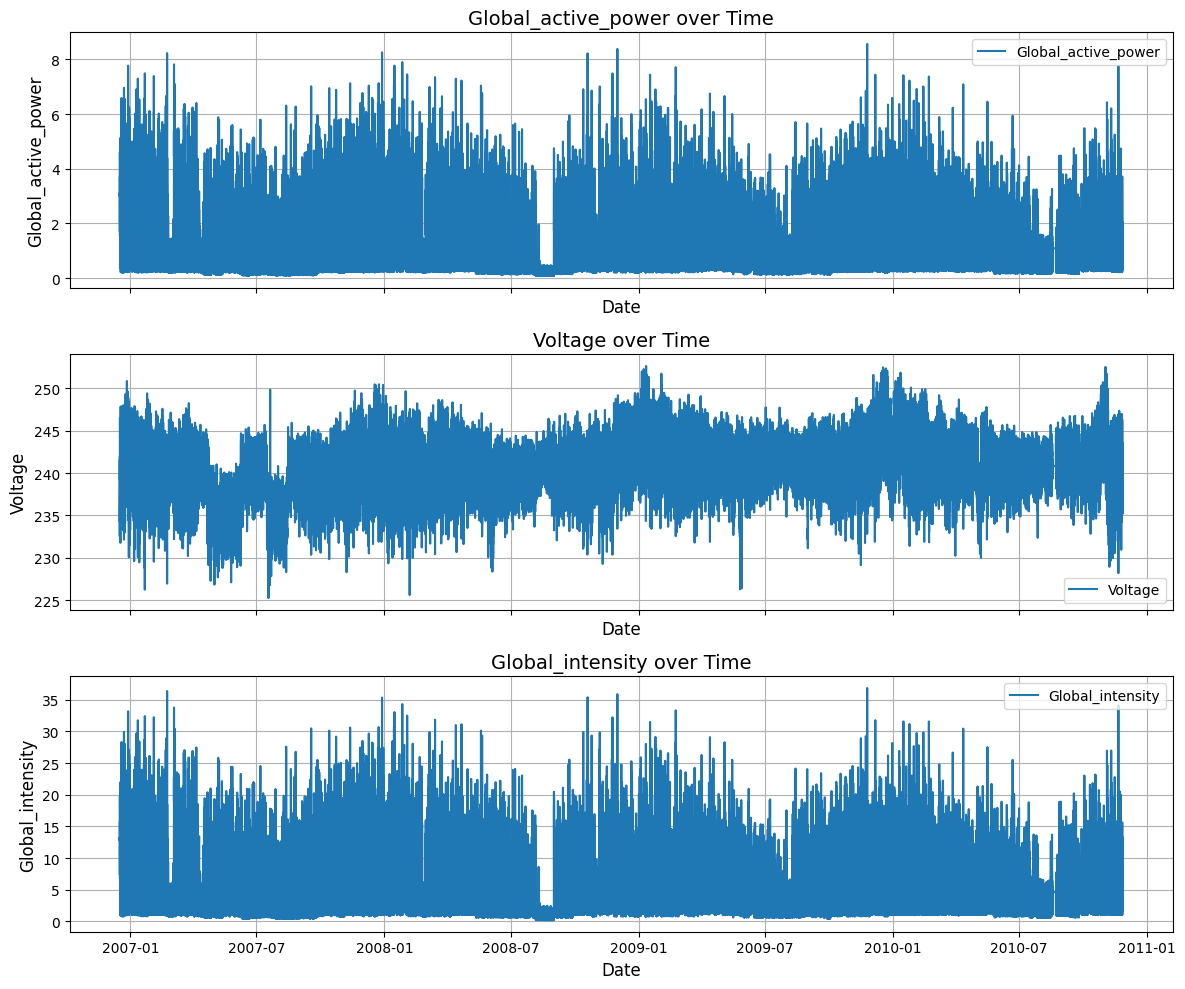

In [20]:
plot_cols = ["Global_active_power", "Voltage", "Global_intensity"]

# Select the columns from the dataframe
data_plotted_cols = data[plot_cols]

# Plot with customizations
fig, axes = plt.subplots(nrows=len(plot_cols), ncols=1, figsize=(12, 10), sharex=True)

# Iterate over each subplot to plot data
for i, col in enumerate(plot_cols):
    axes[i].plot(data_plotted_cols.index, data_plotted_cols[col], label=col, color='tab:blue')
    axes[i].set_title(f'{col} over Time', fontsize=14)
    axes[i].set_xlabel('Date', fontsize=12)
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].legend(loc='best')
    axes[i].grid(True)  # Adding grid for better readability

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


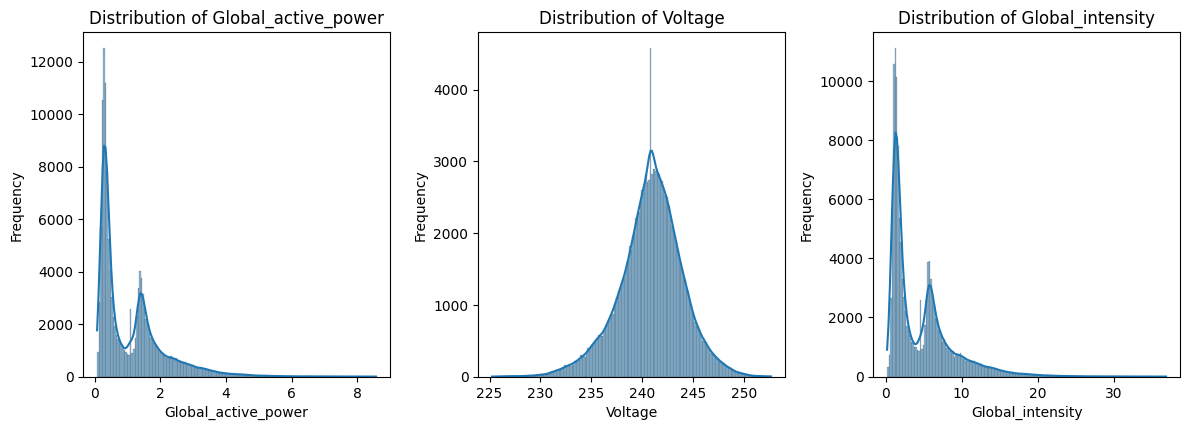

In [21]:
# Columns to plot
plot_cols = ["Global_active_power", "Voltage", "Global_intensity"]

# Plot histogram for each feature
plt.figure(figsize=(12, 8))
for i, col in enumerate(plot_cols):
    plt.subplot(2, 3, i+1)  # 2 rows, 3 columns of subplots
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

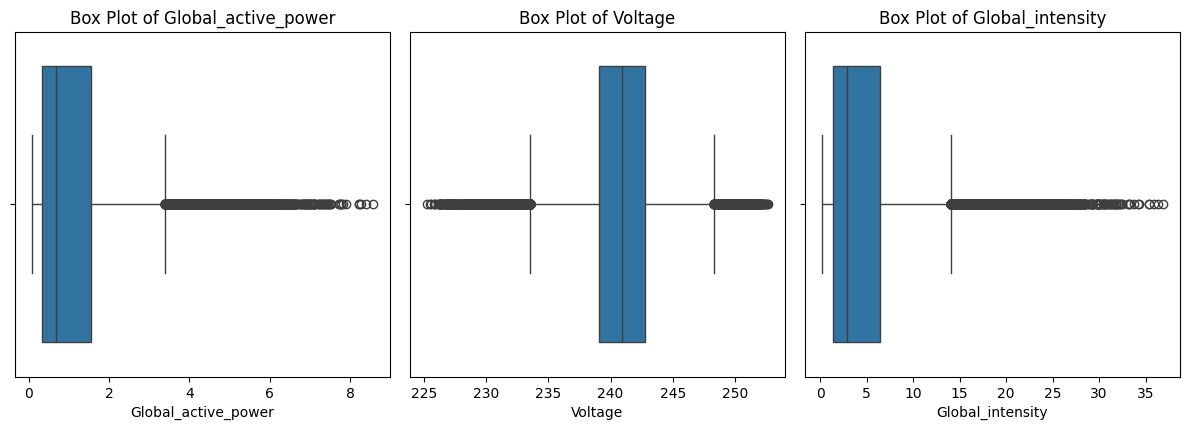

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns to plot
plot_cols = ["Global_active_power", "Voltage", "Global_intensity"]

# Box plot for numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(plot_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


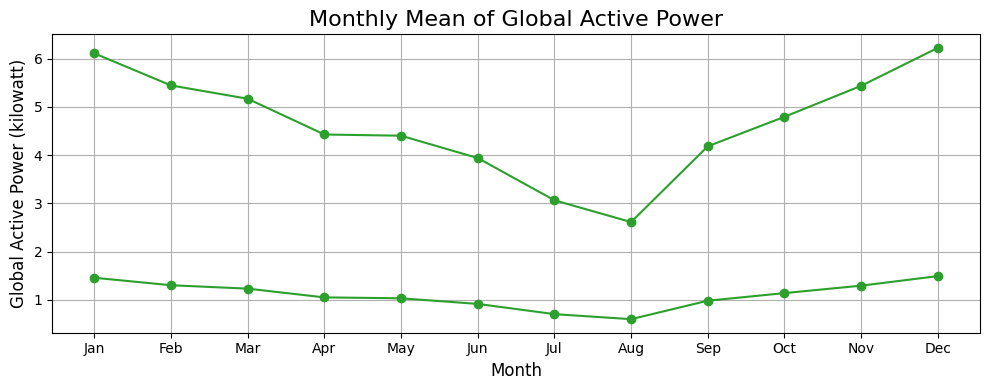

In [23]:
# Group by month and plot the mean for each month across all years
monthly_mean = data.groupby(data.index.month).mean()

# Plot
plt.figure(figsize=(10, 4))
plt.plot(monthly_mean.index, monthly_mean['Global_active_power'], marker='o', color='tab:green')
plt.plot(monthly_mean.index, monthly_mean['Global_intensity'], marker='o', color='tab:green')
plt.title("Monthly Mean of Global Active Power", fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Global Active Power (kilowatt)', fontsize=12)
plt.xticks(monthly_mean.index, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()


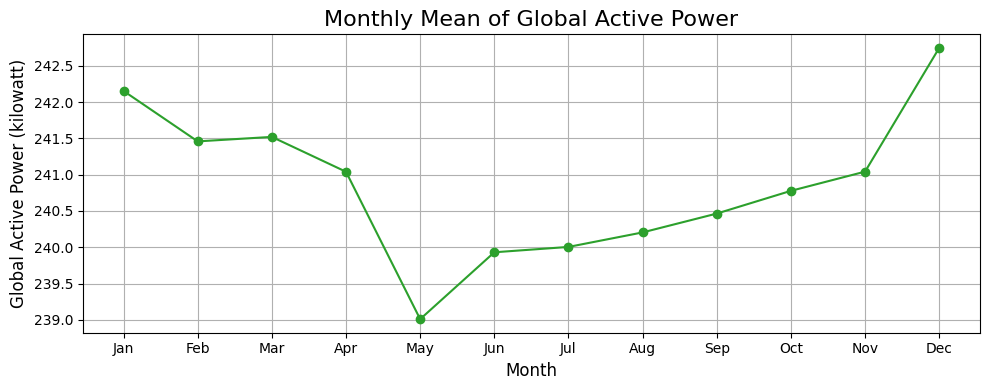

In [24]:

# Plot
plt.figure(figsize=(10, 4))
plt.plot(monthly_mean.index, monthly_mean['Voltage'], marker='o', color='tab:green')
plt.title("Monthly Mean of Global Active Power", fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Global Active Power (kilowatt)', fontsize=12)
plt.xticks(monthly_mean.index, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()

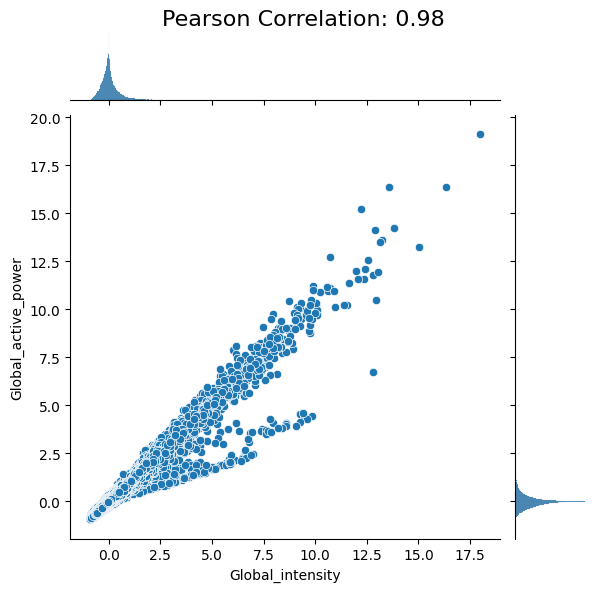

In [25]:

# Calculate the percentage change
data_returns = data.pct_change()

# Calculate the Pearson correlation coefficient
correlation = data_returns['Global_intensity'].corr(data_returns['Global_active_power'])

# Create the jointplot
g = sns.jointplot(x='Global_intensity', y='Global_active_power', data=data_returns)

# Annotate the Pearson correlation on the plot
g.fig.suptitle(f'Pearson Correlation: {correlation:.2f}', fontsize=16)

# Adjust the title position to avoid overlap
g.fig.subplots_adjust(top=0.95)

# Display the plot
plt.show()

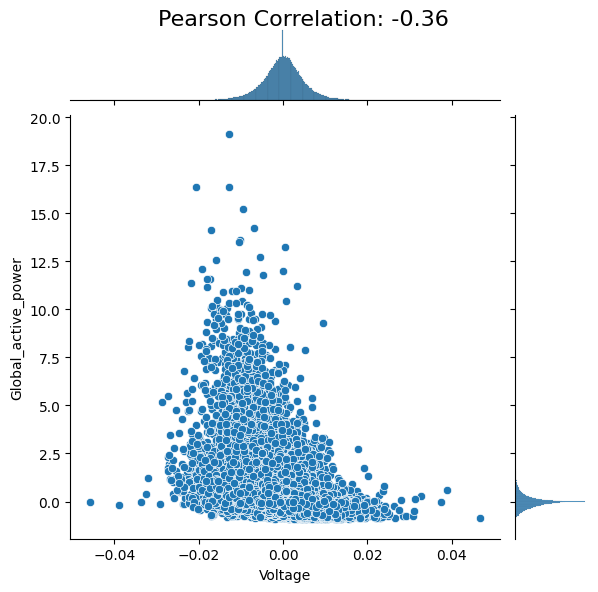

In [26]:

# Calculate the percentage change
data_returns = data.pct_change()

# Calculate the Pearson correlation coefficient
correlation = data_returns['Voltage'].corr(data_returns['Global_active_power'])

# Create the jointplot
g = sns.jointplot(x='Voltage', y='Global_active_power', data=data_returns)

# Annotate the Pearson correlation on the plot
g.fig.suptitle(f'Pearson Correlation: {correlation:.2f}', fontsize=16)

# Adjust the title position to avoid overlap
g.fig.subplots_adjust(top=0.95)

# Display the plot
plt.show()

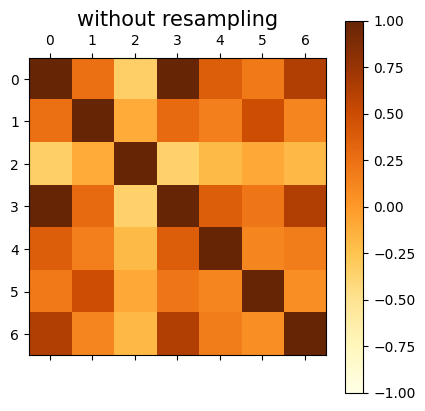

In [27]:
# Correlations among columns
plt.matshow(data.corr(method='spearman'),vmax=1,vmin=-1,cmap='YlOrBr')
plt.title('without resampling', size=15)
plt.colorbar()
plt.show()

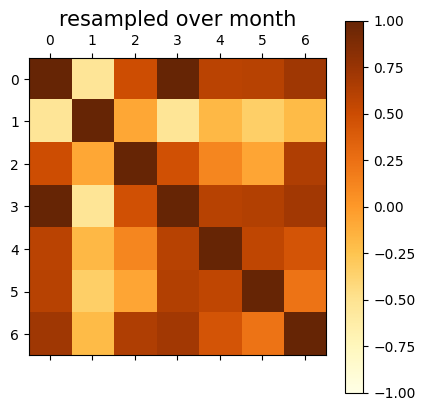

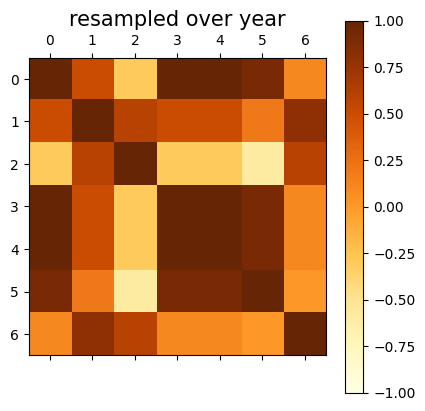

In [28]:
# Correlations of mean of features resampled over months
plt.matshow(data.resample('ME').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='YlOrBr')
plt.title('resampled over month', size=15)
plt.colorbar()
plt.margins(0.02)
plt.matshow(data.resample('YE').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='YlOrBr')
plt.title('resampled over year', size=15)
plt.colorbar()
plt.show()

In [29]:
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_time,,,,,,,
2006-12-16 17:15:00,4.587333,0.484000,234.366667,19.700000,0.0,1.333333,16.833333
2006-12-16 17:30:00,4.140667,0.327733,234.768667,17.773333,0.0,0.733333,16.866667
2006-12-16 17:45:00,4.159333,0.028267,234.630000,17.786667,0.0,0.000000,16.866667
2006-12-16 18:00:00,4.121067,0.152533,235.566000,17.706667,0.0,19.933333,17.000000
2006-12-16 18:15:00,3.768533,0.017200,234.803333,16.226667,0.0,2.866667,16.933333
...,...,...,...,...,...,...,...
2010-11-26 20:00:00,1.634533,0.058000,239.539333,6.933333,0.0,1.400000,0.000000
2010-11-26 20:15:00,1.078933,0.117067,240.094667,4.560000,0.0,1.200000,0.000000
2010-11-26 20:30:00,0.979200,0.047867,238.822667,4.120000,0.0,1.133333,0.000000


In [30]:
df = data

In [31]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_time,,,,,,,
2006-12-16 17:15:00,4.587333,0.484000,234.366667,19.700000,0.0,1.333333,16.833333
2006-12-16 17:30:00,4.140667,0.327733,234.768667,17.773333,0.0,0.733333,16.866667
2006-12-16 17:45:00,4.159333,0.028267,234.630000,17.786667,0.0,0.000000,16.866667
2006-12-16 18:00:00,4.121067,0.152533,235.566000,17.706667,0.0,19.933333,17.000000
2006-12-16 18:15:00,3.768533,0.017200,234.803333,16.226667,0.0,2.866667,16.933333
...,...,...,...,...,...,...,...
2010-11-26 20:00:00,1.634533,0.058000,239.539333,6.933333,0.0,1.400000,0.000000
2010-11-26 20:15:00,1.078933,0.117067,240.094667,4.560000,0.0,1.200000,0.000000
2010-11-26 20:30:00,0.979200,0.047867,238.822667,4.120000,0.0,1.133333,0.000000


In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

def preprocess_data(df, time_steps=60):
    # Ensure the datetime index is in proper datetime format (if not already done)
    df.index = pd.to_datetime(df.index)

    # Calculate active energy consumed by unmetered devices (if applicable)
    # Assuming that the unmetered energy is the global_active_power minus the sub-metering energy values
    df['unmetered_energy'] = df['Global_active_power'] - (df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']) / 1000  # Convert to kWh

    # Drop rows with missing values (if any)
    df = df.dropna()

    # Normalize the features using MinMaxScaler (scales data between 0 and 1)
    scaler = MinMaxScaler()
    df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity',
        'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'unmetered_energy']] = \
        scaler.fit_transform(df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity',
                                 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'unmetered_energy']])

    # Prepare data for LSTM: Create sequences of data for time-series prediction
    # X will contain features for time_steps previous minutes, y will contain the target value (Global_active_power)
    X, y = [], []
    for i in range(time_steps, len(df)):
        X.append(df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity',
                     'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'unmetered_energy']].iloc[i-time_steps:i].values)
        y.append(df['Global_active_power'].iloc[i])

    X, y = np.array(X), np.array(y)

    # Split the data into training and testing sets (e.g., 80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    return X_train, X_test, y_train, y_test, scaler

# Example of using the function:
# Assuming `df` is your original DataFrame with datetime already set as index
# df = pd.read_csv('household_power_consumption.csv', index_col='datetime')  # Load dataset

X_train, X_test, y_train, y_test, scaler = preprocess_data(df)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (110633, 60, 8)
Testing data shape: (27659, 60, 8)


In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=input_shape),  # First LSTM layer
        Dropout(0.2),  # Dropout to reduce overfitting
        LSTM(64, return_sequences=False),  # Second LSTM layer
        Dropout(0.2),
        Dense(32, activation='relu'),  # Fully connected layer
        Dense(1)  # Output layer for regression (predict power consumption)
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

# Build the model
input_shape = (60, 8)  # (time_steps=60, features=8)
model = build_lstm_model(input_shape)

# Model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 60, 128)             │          70,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,665 (475.25 KB)

 Trainable params: 121,665 (475.25 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# Save the trained model
model.save("lstm_energy_model.h5")

Epoch 1/50
1729/1729 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - loss: 0.0060 - mae: 0.0504 - val_loss: 0.0028 - val_mae: 0.0315
Epoch 2/50
1729/1729 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - loss: 0.0038 - mae: 0.0375 - val_loss: 0.0027 - val_mae: 0.0321
Epoch 3/50
1729/1729 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - loss: 0.0038 - mae: 0.0370 - val_loss: 0.0027 - val_mae: 0.0318
Epoch 4/50
1729/1729 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - loss: 0.0037 - mae: 0.0365 - val_loss: 0.0027 - val_mae: 0.0311
Epoch 5/50
1729/1729 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - loss: 0.0036 - mae: 0.0359 - val_loss: 0.0027 - val_mae: 0.0320
Epoch 6/50
1729/1729 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 0.0036 - mae: 0.0360 - val_loss: 0.0026 - val_mae: 0.0308
Epoch 7/50
1729/1729 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - loss: 0.0036 - mae: 0.0357 - val_loss: 0.0026 - val_mae: 0.0310
Epoch 8/50
1729/1729 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - loss: 0.0036 - mae: 0.0356 - val_loss: 0.0026 - val_mae: 0.0309
Epoch 9/50
1729/1729 ━━━━

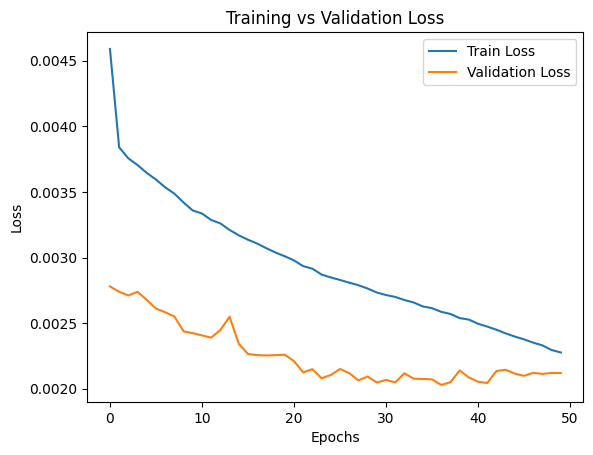

Test Loss: 0.0021
Test MAE: 0.0268


In [36]:
import matplotlib.pyplot as plt

# Plot training vs validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.show()

# Evaluate on test data
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")


865/865 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


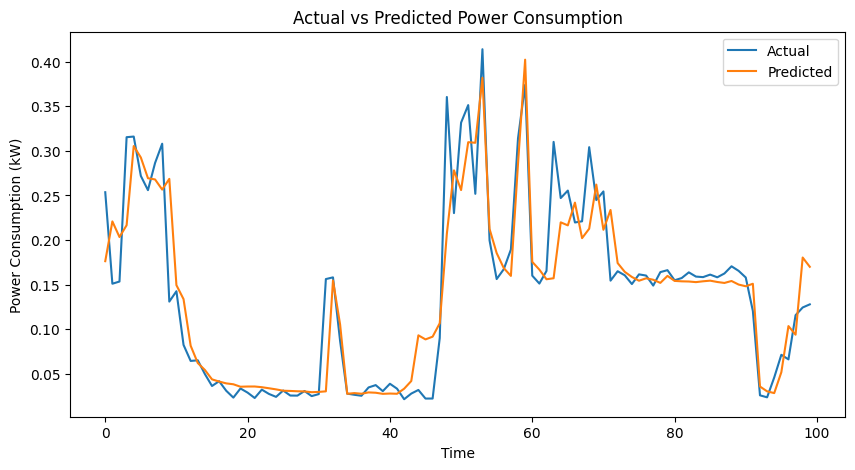

In [38]:
# Make predictions
y_pred = model.predict(X_test)

# # Inverse transform predictions to original scale
# y_pred_original = scaler.inverse_transform(y_pred.reshape(-1, 1))  # Rescale back

# Rescale only the target variable (first column)
y_pred_original = scaler.inverse_transform(
    np.concatenate([y_pred.reshape(-1, 1), np.zeros((y_pred.shape[0], 7))], axis=1)
)[:, 0]  # Take only first column after transformation


# Plot actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_test[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Power Consumption")
plt.xlabel("Time")
plt.ylabel("Power Consumption (kW)")
plt.show()


In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Rescale predictions to original scale
y_pred_original = scaler.inverse_transform(
    np.concatenate([y_pred.reshape(-1, 1), np.zeros((y_pred.shape[0], 7))], axis=1)
)[:, 0]  # Take only the first column

y_test_original = scaler.inverse_transform(
    np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 7))], axis=1)
)[:, 0]

# Compute performance metrics
mae = mean_absolute_error(y_test_original, y_pred_original)
mse = mean_squared_error(y_test_original, y_pred_original)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, y_pred_original)

# Print report
print("📊 Model Performance Summary:")
print(f"🔹 Mean Absolute Error (MAE): {mae:.4f}")
print(f"🔹 Mean Squared Error (MSE): {mse:.4f}")
print(f"🔹 Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"🔹 R² Score: {r2:.4f}")


📊 Model Performance Summary:
🔹 Mean Absolute Error (MAE): 0.2278
🔹 Mean Squared Error (MSE): 0.1527
🔹 Root Mean Squared Error (RMSE): 0.3908
🔹 R² Score: 0.7692


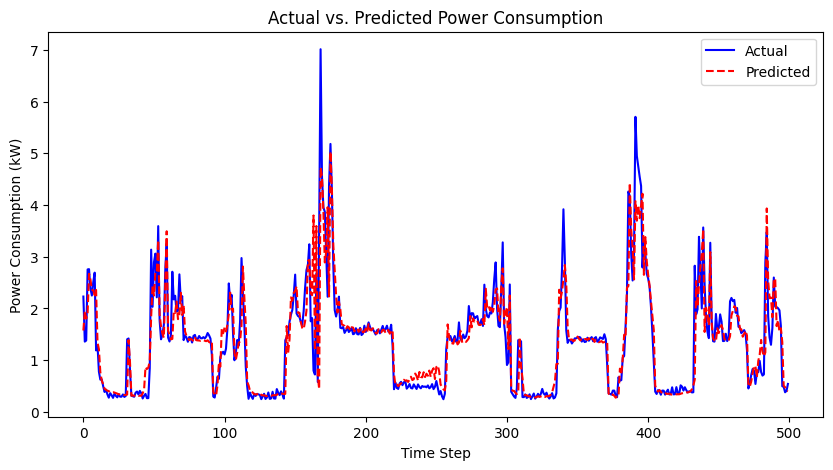

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test_original[:500], label="Actual", color='blue')
plt.plot(y_pred_original[:500], label="Predicted", color='red', linestyle='dashed')
plt.xlabel("Time Step")
plt.ylabel("Power Consumption (kW)")
plt.title("Actual vs. Predicted Power Consumption")
plt.legend()
plt.show()

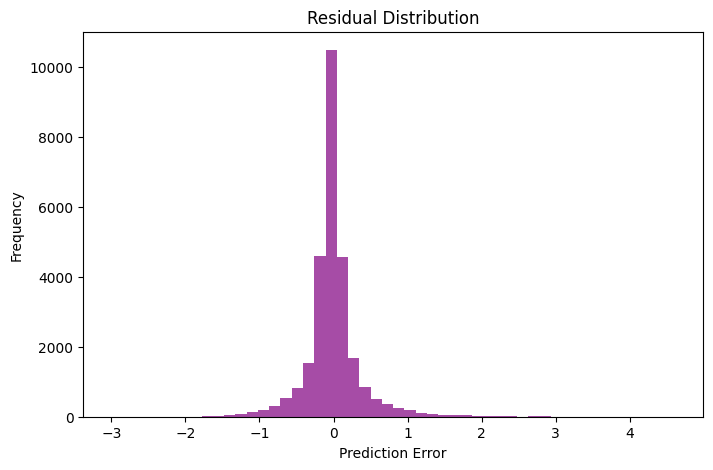

In [41]:
plt.figure(figsize=(8, 5))
residuals = y_test_original - y_pred_original
plt.hist(residuals, bins=50, color='purple', alpha=0.7)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()


In [42]:
with open("model_performance_report.txt", "w") as f:
    f.write("📊 Model Performance Summary:\n")
    f.write(f"🔹 Mean Absolute Error (MAE): {mae:.4f}\n")
    f.write(f"🔹 Mean Squared Error (MSE): {mse:.4f}\n")
    f.write(f"🔹 Root Mean Squared Error (RMSE): {rmse:.4f}\n")
    f.write(f"🔹 R² Score: {r2:.4f}\n")
print("✅ Report saved as 'model_performance_report.txt'")


✅ Report saved as 'model_performance_report.txt'


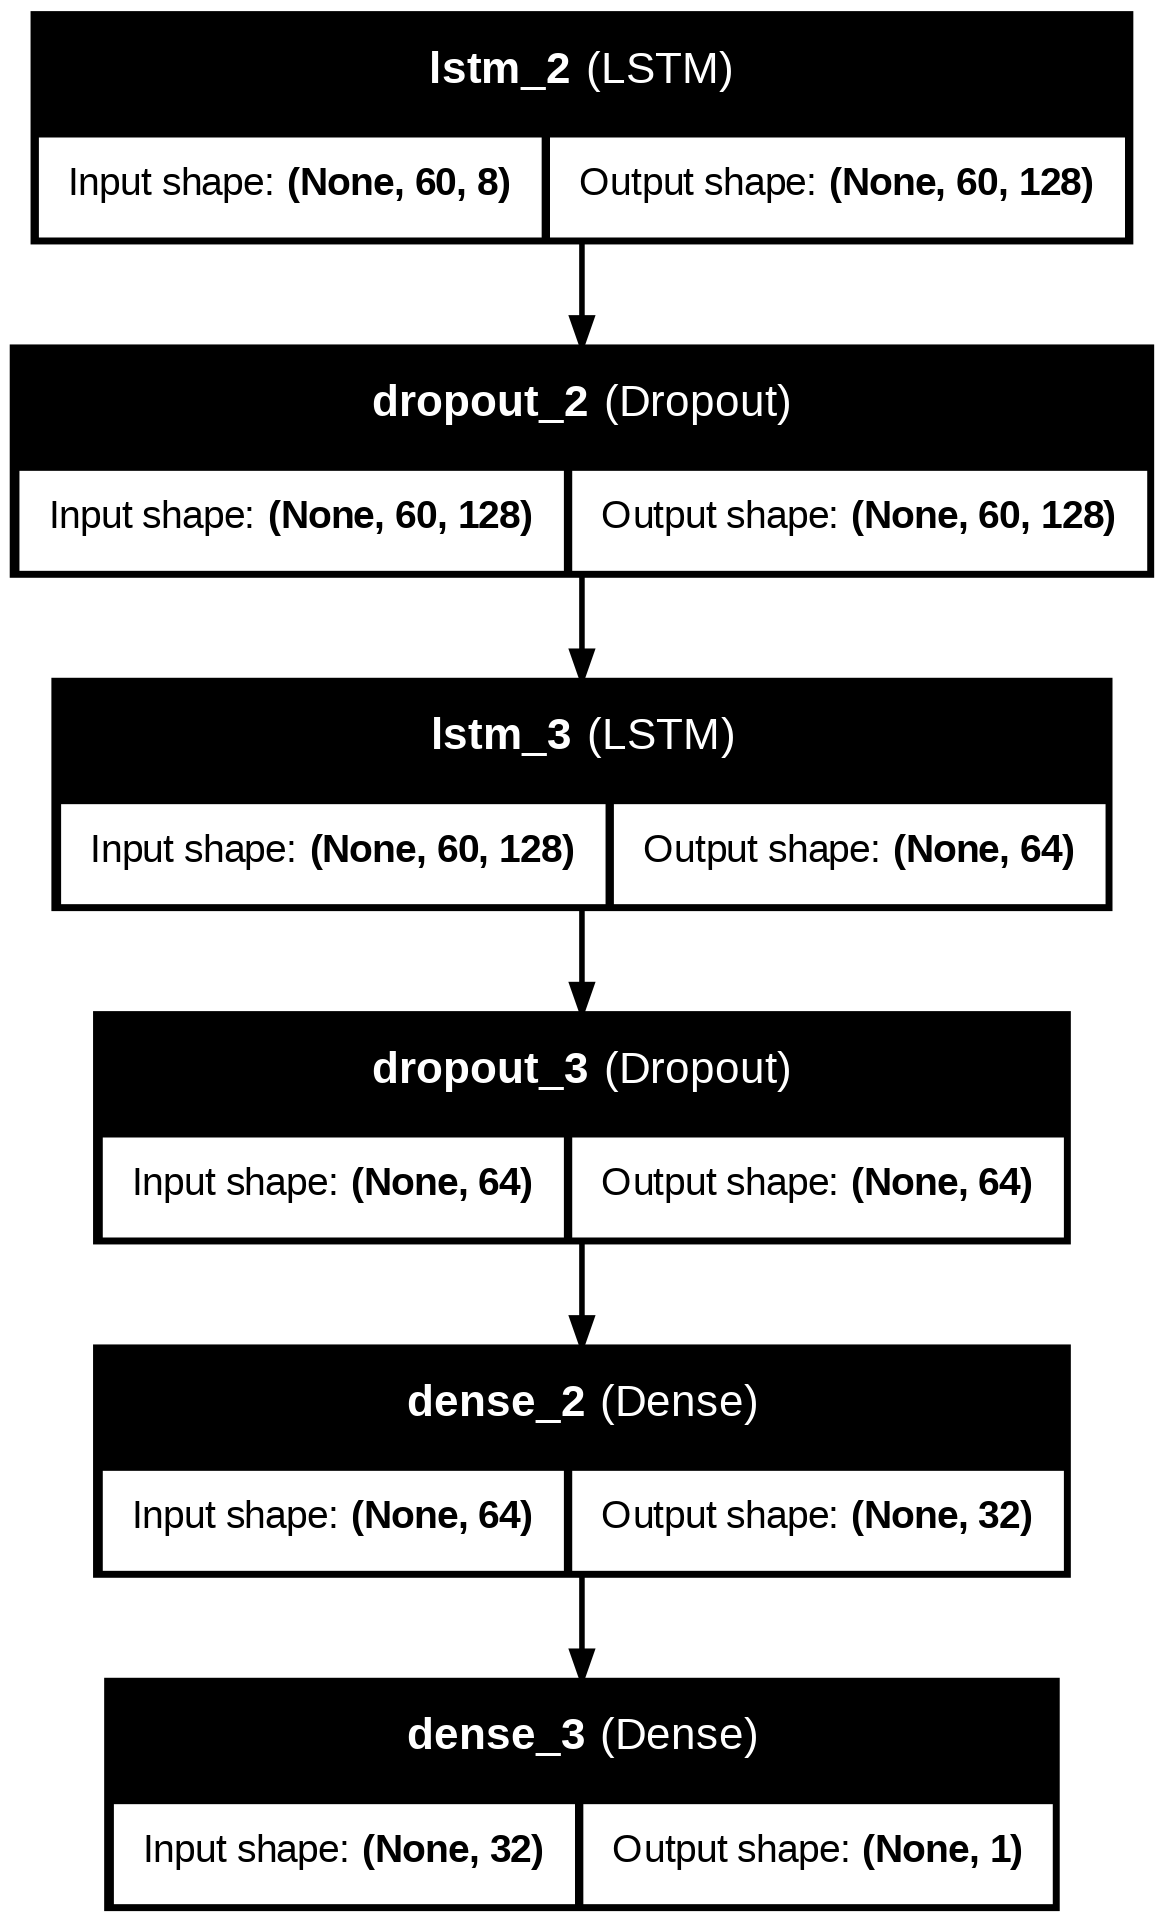

In [43]:
from tensorflow.keras.utils import plot_model

# Save model architecture to an image file
plot_model(model, to_file="lstm_model.png", show_shapes=True, show_layer_names=True)

# Display the model architecture in Jupyter Notebook
from IPython.display import Image
Image("lstm_model.png")
